In [8]:
import torch
import torch.nn as nn
import glob
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Single Sample merge and plot 

In [9]:
single_sample = "ManasLabDay2/"

In [10]:
tt = "/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Onion1/Onion1.1718618768589.csv"
tt_data = pd.read_csv(tt)
header = tt_data.columns

In [33]:
print(os.getcwd()+"/ManasLabDay2")
ospath = f"{os.getcwd()}/ManasLabDay2"
total_data = pd.DataFrame([])

for c_name in os.listdir(ospath):
    class_name= c_name 
    inside_class= os.path.join(ospath , c_name)
    for csv_data in os.listdir(inside_class):
        csv_data_path = os.path.join(inside_class , csv_data)
        # print(csv_data_path)
        try:
            data = pd.read_csv(csv_data_path )
            # print(data.shape)
            if list(data.columns !=header):
                data.columns =header
                temp = c_name[:-1] if (c_name[-1].isdigit()) else c_name
                # temp = c_name
                # print(temp)
                data['label'] = temp
                if(data.voc2==0):
                    print(csv_data_path)
            
        except:
            # print(csv_data_path)
            pass
        total_data = pd.concat([total_data , data] ,axis= 0 ,ignore_index=True)
        # print(total_data.shape)
        # print(c_name)
        
        
print(total_data.shape)
        

/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2
(446811, 13)


In [35]:
total_data['timestamp']

0         1430844
1         1430944
2         1431044
3         1431144
4         1431244
           ...   
446806    7554492
446807    7554592
446808    7554692
446809    7554792
446810    7554892
Name: timestamp, Length: 446811, dtype: int64

In [36]:
total_data['timestamp']= total_data['timestamp'].sort_values()


In [42]:
total_data['timestamp'].is_monotonic_increasing

False

# After merging all Data 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


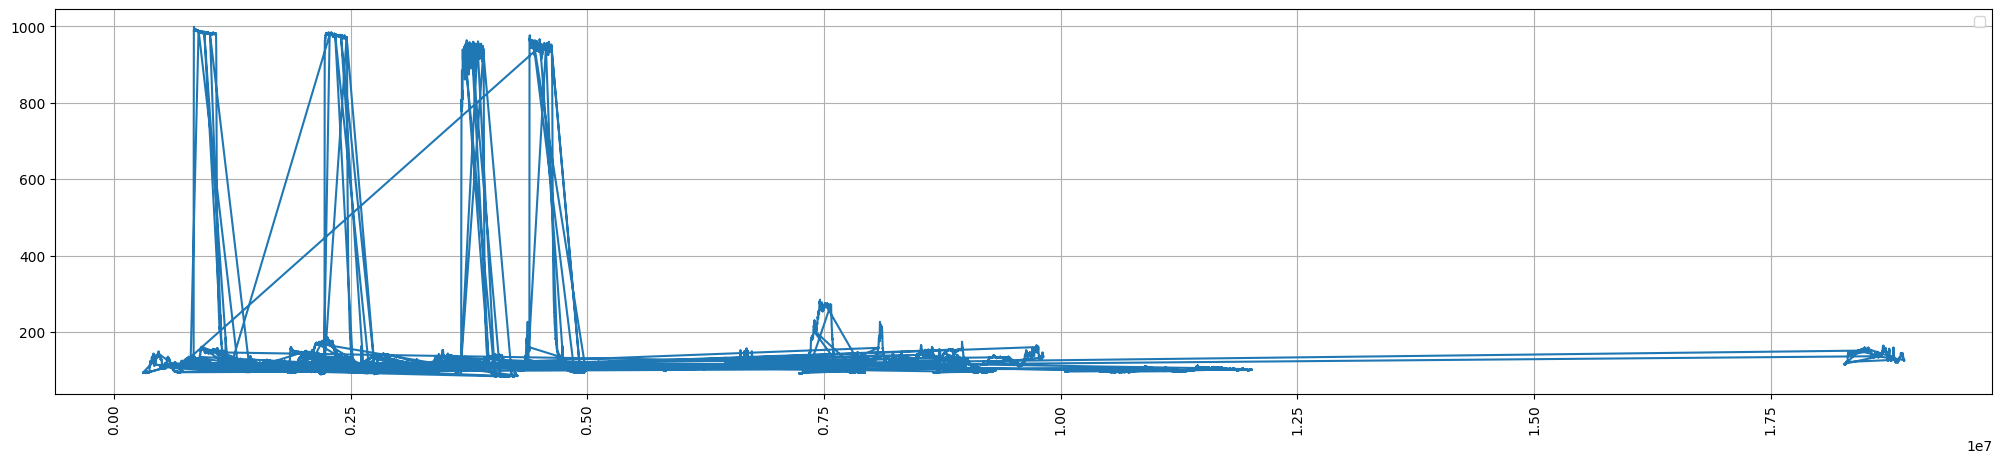

In [41]:
plt.figure(figsize=(25,5))
plt.grid()
plt.plot(df['timestamp'], df['co'], marker='')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data=total_data, x='label')
plt.title('Distribution of Classes')
plt.show()

# Assuming you want to plot time series data for a specific column
# Here, I'll assume 'time' is the time column and 'value' is the column you want to plot
# Replace 'time' and 'value' with actual column names from your data

# Plot a few time series from each class
plt.figure(figsize=(14, 8))
for label in total_data['label'].unique():
    subset = total_data[total_data['label'] == label]
    plt.plot(subset['timestamp'].values[:100], subset['voc2'].values[:100], label=label)  # Plot first 100 values for simplicity
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:

# sns.pairplot(data = total_data, hue="label")

In [12]:
total_data.describe()

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135
count,2.501120e+05,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000,250112.000000
mean,4.882655e+06,546.882201,665.458882,356.851918,150.290890,35.082669,88.211932,30.182409,472.864917,350.649085,339.125104,503.283077
std,3.795058e+06,106.840870,87.674480,140.209060,163.491261,1.303076,0.182922,5.407584,123.825946,51.745275,42.363546,76.265367
min,3.040770e+05,352.000000,479.000000,160.000000,83.000000,32.690000,87.870000,22.070000,0.000000,228.000000,3.000000,276.000000
25%,2.184210e+06,479.000000,607.000000,266.000000,104.000000,33.620000,88.070000,26.510000,368.000000,310.000000,312.000000,442.000000
50%,3.667338e+06,514.000000,648.000000,309.000000,115.000000,35.680000,88.230000,29.430000,462.000000,340.000000,337.000000,481.000000
75%,7.497304e+06,590.000000,709.000000,395.000000,127.000000,36.030000,88.370000,30.990000,557.000000,398.000000,364.000000,548.000000
max,1.890958e+07,924.000000,914.000000,821.000000,999.000000,37.270000,88.590000,43.270000,945.000000,601.000000,613.000000,1023.000000


In [ ]:
total_data.info()

In [12]:
total_data.head()

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
0,1430844,530.0,651.0,338.0,120.0,36.44,88.07,26.15,364.0,284.0,307.0,579.0,Soap
1,1430944,529.0,651.0,339.0,120.0,36.44,88.07,26.15,365.0,283.0,309.0,578.0,Soap
2,1431044,529.0,651.0,338.0,120.0,36.44,88.07,26.15,365.0,282.0,307.0,593.0,Soap
3,1431144,529.0,651.0,338.0,121.0,36.44,88.07,26.15,364.0,285.0,308.0,582.0,Soap
4,1431244,530.0,651.0,339.0,121.0,36.44,88.07,26.15,365.0,284.0,308.0,583.0,Soap


In [ ]:
total_data.iloc[:, 1:12].head(), total_data['label'].head()

In [8]:
total_data.sample(4)

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
13483,1049037,489.0,621.0,292.0,117.0,37.04,88.11,23.72,416.0,390.0,346.0,483.0,Clinic_plus
279052,21424230,289.0,475.0,164.0,119.0,35.48,88.10,26.59,248.0,261.0,236.0,375.0,Garlic
157479,6569648,564.0,804.0,539.0,125.0,32.92,88.42,41.95,383.0,293.0,340.0,487.0,Cardamom
296380,9347252,460.0,687.0,288.0,116.0,35.64,88.31,28.65,411.0,324.0,301.0,427.0,Vicks


([0], [Text(0, 0, '')])

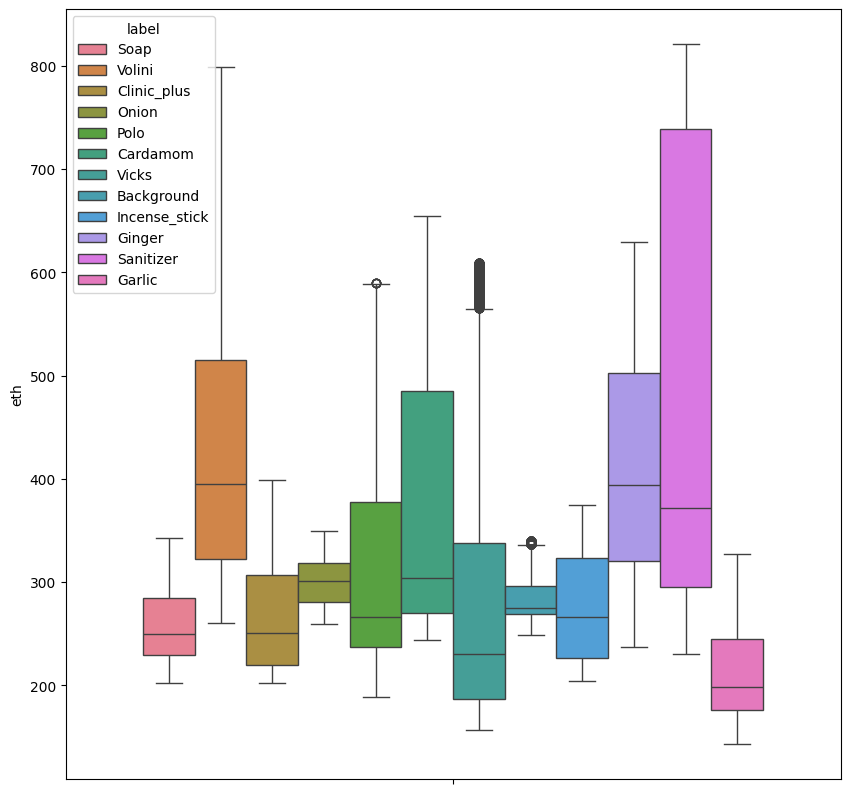

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data = total_data, y="eth", hue="label")
plt.xticks(rotation=90)

# One Hot Encoding 

In [10]:
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(total_data['label'])
print(f"Integer Encoded Labels: {integer_encoded}")

Integer Encoded Labels: [ 9  9  9 ... 10 10 10]


In [12]:
integer_encoded_tensor = torch.tensor(integer_encoded)

# Convert integer tensor to one-hot encoding
num_classes = len(label_encoder.classes_)
one_hot_encoded = F.one_hot(integer_encoded_tensor, num_classes=num_classes)
print(f"One Hot Encoded Labels:\n{one_hot_encoded}")

One Hot Encoded Labels:
tensor([[0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0]])


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
categorical_columns = total_data.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(total_data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([total_data, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

# print(f"Encoded Employee data : \n{df_encoded}")



In [20]:
df_encoded.sample(3)

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,...,label_Garlic,label_Ginger,label_Incense_stick,label_Onion,label_Polo,label_Sanitizer,label_Soap,label_Turmeric,label_Vicks,label_Volini
136143,2380028,912.0,854.0,815.0,975.0,35.76,88.31,28.22,830.0,442.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
381366,7684239,474.0,577.0,254.0,108.0,35.56,88.34,29.08,431.0,353.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
264085,4954249,462.0,629.0,264.0,138.0,35.89,88.09,32.12,346.0,297.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_encoded.iloc[ : , 12 : ].head()

,Background,Cardamom,Clinic_plus,Garlic,Ginger,Incense_stick,Onion,Polo,Sanitizer,Soap,...,label_Clinic_plus,label_Garlic,label_Ginger,label_Incense_stick,label_Onion,label_Polo,label_Sanitizer,label_Soap,label_Vicks,label_Volini
0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Random Forest


In [132]:
# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [133]:
X = total_data.iloc[: , 1:-1]
y = total_data.iloc[: , -1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
# x_train, y_train, y_test

(         voc2    no2    eth     co   temp  pressure  humidity    mq3    mq7  \
 287559  845.0  759.0  659.0  944.0  35.98     88.32     28.45  780.0  427.0   
 24472   488.0  663.0  323.0  117.0  36.68     88.14     28.75  361.0  320.0   
 195545  480.0  556.0  227.0  103.0  35.93     88.39     29.93  504.0  431.0   
 175902  472.0  576.0  242.0  108.0  35.84     88.38     29.78  468.0  406.0   
 234914  500.0  669.0  333.0  110.0  35.78     88.16     23.76  421.0  281.0   
 ...       ...    ...    ...    ...    ...       ...       ...    ...    ...   
 119879  479.0  658.0  297.0  117.0  35.71     88.09     29.04  334.0  375.0   
 259178  411.0  512.0  194.0  108.0  35.53     88.36     29.37  368.0  387.0   
 131932  513.0  607.0  278.0   95.0  35.95     88.32     27.72  494.0  409.0   
 146867  444.0  571.0  221.0  102.0  36.76     88.17     22.72  427.0  342.0   
 121958  480.0  660.0  302.0  118.0  35.81     88.10     29.00  334.0  372.0   
 
           mq9  mq135  
 287559  357.0

Accuracy is:  1.0


<Axes: >

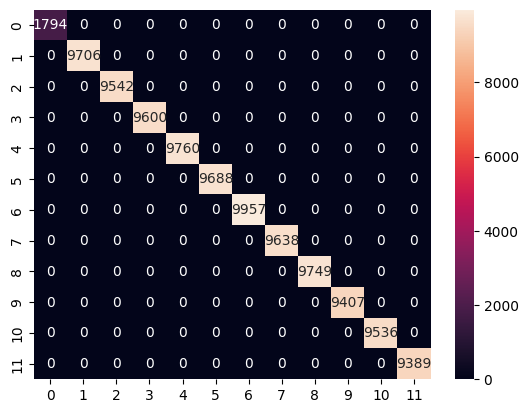

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# Pearson correlation


In [ ]:
#change the catagorical data of label 
trainCorr = df_encoded.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df_encoded, annot=True)

In [ ]:
scaler = MinMaxScaler()
#train data
data_scaled = scaler.fit_transform(total_data.iloc[:, 1:10])  # Select columns to normalize
X = data_scaled
y = total_data.iloc[:, -1].values  # Select label columns
y_distinct = set(y)

In [ ]:
len(y_distinct)

In [ ]:
data_scaled[0], y.shape

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create sequences
sequence_length = 10

def create_sequences(data, targets, seq_length):
    sequences = []
    target_sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target_sequences.append(targets[i+seq_length])
    return torch.stack(sequences), torch.stack(target_sequences)

X_train_seq, y_train_seq = create_sequences(X_train_tensor, y_train_tensor, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_tensor, y_test_tensor, sequence_length)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_seq, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_seq, y_test_seq)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# FCNN

In [59]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.DataFrame(total_data)
print(df.head())

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

features = df.drop(['timestamp','label'], axis=1)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

X = torch.tensor(features_normalized, dtype=torch.float32)
y = torch.tensor(df['label'].values, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   timestamp   voc2    no2    eth     co   temp  pressure  humidity    mq3  \
0    1430844  530.0  651.0  338.0  120.0  36.44     88.07     26.15  364.0   
1    1430944  529.0  651.0  339.0  120.0  36.44     88.07     26.15  365.0   
2    1431044  529.0  651.0  338.0  120.0  36.44     88.07     26.15  365.0   
3    1431144  529.0  651.0  338.0  121.0  36.44     88.07     26.15  364.0   
4    1431244  530.0  651.0  339.0  121.0  36.44     88.07     26.15  365.0   

     mq7    mq9  mq135 label  
0  284.0  307.0  579.0  Soap  
1  283.0  309.0  578.0  Soap  
2  282.0  307.0  593.0  Soap  
3  285.0  308.0  582.0  Soap  
4  284.0  308.0  583.0  Soap  


In [74]:
df

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
0,1430844,530.0,651.0,338.0,120.0,36.44,88.07,26.15,364.0,284.0,307.0,579.0,9
1,1430944,529.0,651.0,339.0,120.0,36.44,88.07,26.15,365.0,283.0,309.0,578.0,9
2,1431044,529.0,651.0,338.0,120.0,36.44,88.07,26.15,365.0,282.0,307.0,593.0,9
3,1431144,529.0,651.0,338.0,121.0,36.44,88.07,26.15,364.0,285.0,308.0,582.0,9
4,1431244,530.0,651.0,339.0,121.0,36.44,88.07,26.15,365.0,284.0,308.0,583.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359212,7554492,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,333.0,305.0,390.0,10
359213,7554592,528.0,716.0,380.0,115.0,35.33,88.34,29.34,442.0,333.0,305.0,390.0,10
359214,7554692,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,334.0,306.0,390.0,10
359215,7554792,528.0,716.0,379.0,114.0,35.33,88.34,29.34,442.0,333.0,304.0,390.0,10


In [75]:
class FCNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_dim = X_train.shape[1] #11 
output_dim = len(label_encoder.classes_) #12 class 
model = FCNN(input_dim, output_dim)


In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
train_losses =[]

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 2.5164
Epoch [2/50], Loss: 2.4889
Epoch [3/50], Loss: 2.4621
Epoch [4/50], Loss: 2.4360
Epoch [5/50], Loss: 2.4103
Epoch [6/50], Loss: 2.3848
Epoch [7/50], Loss: 2.3592
Epoch [8/50], Loss: 2.3334
Epoch [9/50], Loss: 2.3072
Epoch [10/50], Loss: 2.2805
Epoch [11/50], Loss: 2.2530
Epoch [12/50], Loss: 2.2248
Epoch [13/50], Loss: 2.1960
Epoch [14/50], Loss: 2.1665
Epoch [15/50], Loss: 2.1361
Epoch [16/50], Loss: 2.1050
Epoch [17/50], Loss: 2.0731
Epoch [18/50], Loss: 2.0405
Epoch [19/50], Loss: 2.0072
Epoch [20/50], Loss: 1.9733
Epoch [21/50], Loss: 1.9391
Epoch [22/50], Loss: 1.9045
Epoch [23/50], Loss: 1.8697
Epoch [24/50], Loss: 1.8346
Epoch [25/50], Loss: 1.7994
Epoch [26/50], Loss: 1.7641
Epoch [27/50], Loss: 1.7288
Epoch [28/50], Loss: 1.6935
Epoch [29/50], Loss: 1.6583
Epoch [30/50], Loss: 1.6232
Epoch [31/50], Loss: 1.5885
Epoch [32/50], Loss: 1.5542
Epoch [33/50], Loss: 1.5204
Epoch [34/50], Loss: 1.4871
Epoch [35/50], Loss: 1.4544
Epoch [36/50], Loss: 1.4223
E

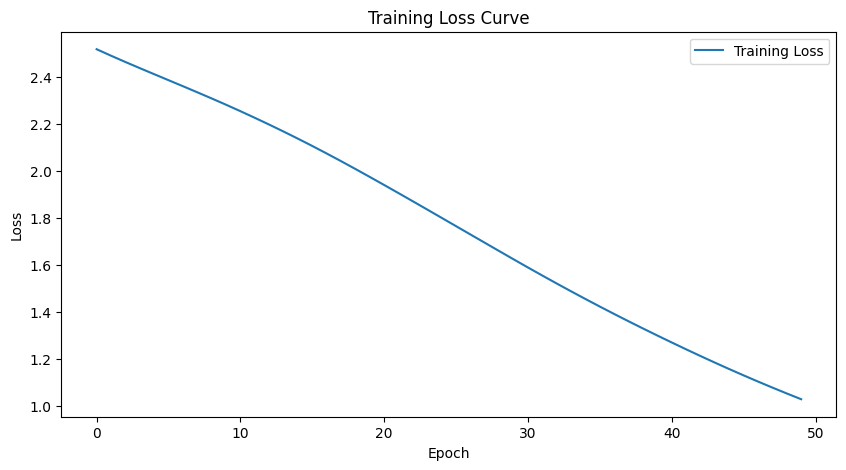

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [78]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 79.46%


In [38]:
data = total_data.iloc[: , 1:]

# LSTM 

In [21]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# df = pd.DataFrame(total_data.iloc[:,1:])
df = pd.DataFrame(total_data)

# categorical labels to integer indices
# label_encoder = LabelEncoder()
# df['label'] = label_encoder.fit_transform(df['label'])

features = df.drop(['timestamp','label'], axis=1)
print(features.shape)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

(384878, 11)


### handling labels

In [22]:
labels = np.array(df_encoded.iloc[:, 12:])
print(labels.shape)

(384878, 13)


### converting to tensor

In [23]:
X = torch.tensor(features_normalized, dtype=torch.float32)
y = torch.tensor(labels)


# X = X.unsqueeze(1)  # Shape: (batch_size, sequence_length, input_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape
# print(len(label_encoder.classes_))

(torch.Size([307902, 11]),
 torch.Size([307902, 13]),
 torch.Size([76976, 11]),
 torch.Size([76976, 13]))

In [36]:
X_train.shape, y_train.shape[1]

IndexError: tuple index out of range

In [20]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out, _ = self.lstm(x)   
        # print(f' out shape : {out.shape} {type(out)}')
        out = self.fc(out)
        print("forword pass" , out.shape)
        return out

input_dim = X_train.shape[1]
hidden_dim = 32
output_dim = y_train.shape[1]
num_layers = 2

model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)


In [48]:
model

LSTMModel(
  (lstm): LSTM(11, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=24, bias=True)
)

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

forword pass torch.Size([287373, 12])
Epoch [1/100], Loss: 2.4868
forword pass torch.Size([287373, 12])
Epoch [2/100], Loss: 2.4851
forword pass torch.Size([287373, 12])
Epoch [3/100], Loss: 2.4833
forword pass torch.Size([287373, 12])
Epoch [4/100], Loss: 2.4817
forword pass torch.Size([287373, 12])
Epoch [5/100], Loss: 2.4800
forword pass torch.Size([287373, 12])
Epoch [6/100], Loss: 2.4785
forword pass torch.Size([287373, 12])
Epoch [7/100], Loss: 2.4769
forword pass torch.Size([287373, 12])
Epoch [8/100], Loss: 2.4754
forword pass torch.Size([287373, 12])
Epoch [9/100], Loss: 2.4739
forword pass torch.Size([287373, 12])
Epoch [10/100], Loss: 2.4724
forword pass torch.Size([287373, 12])
Epoch [11/100], Loss: 2.4709
forword pass torch.Size([287373, 12])
Epoch [12/100], Loss: 2.4694
forword pass torch.Size([287373, 12])
Epoch [13/100], Loss: 2.4679
forword pass torch.Size([287373, 12])
Epoch [14/100], Loss: 2.4663
forword pass torch.Size([287373, 12])
Epoch [15/100], Loss: 2.4648
forw

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
# plt.savefig()
plt.legend()
plt.show()

In [49]:
X_test.shape, y_test.shape

(torch.Size([71844, 11]), torch.Size([71844, 24]))

In [131]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    out = torch.argmax(outputs, dim = 1)
    y_out = torch.argmax(y_test, dim = 1)
    print(outputs.shape, y_test.shape, out.shape, y_out.shape)
    print(out[0])
    print(y_out[0])
    accuracy = (out == y_out).sum() / y_test.shape[0]
    print(f'Accuracy: {accuracy * 100:.2f}%')


torch.Size([71844, 12]) torch.Size([71844, 12]) torch.Size([71844]) torch.Size([71844])
tensor(2)
tensor(2)
Accuracy: 79.46%


# 1D CNN

In [37]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.DataFrame(total_data)

# Convert categorical labels to integer indices
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


features = df.drop(['timestamp', 'label'], axis=1)  
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

X = torch.tensor(features_normalized, dtype=torch.float32)
y = torch.tensor(df['label'].values, dtype=torch.long)
# print(X.shape)

# Add a channel dimension for 1D cnn
X = X.unsqueeze(2)
# Shape of x: (batch_size, num_features, 1)
# print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch [1/100], Loss: 2.4977
Epoch [2/100], Loss: 2.4831
Epoch [3/100], Loss: 2.4699
Epoch [4/100], Loss: 2.4573
Epoch [5/100], Loss: 2.4452
Epoch [6/100], Loss: 2.4329
Epoch [7/100], Loss: 2.4201
Epoch [8/100], Loss: 2.4069
Epoch [9/100], Loss: 2.3931
Epoch [10/100], Loss: 2.3783
Epoch [11/100], Loss: 2.3622
Epoch [12/100], Loss: 2.3448
Epoch [13/100], Loss: 2.3261
Epoch [14/100], Loss: 2.3058
Epoch [15/100], Loss: 2.2839
Epoch [16/100], Loss: 2.2602
Epoch [17/100], Loss: 2.2348
Epoch [18/100], Loss: 2.2077
Epoch [19/100], Loss: 2.1789
Epoch [20/100], Loss: 2.1483
Epoch [21/100], Loss: 2.1160
Epoch [22/100], Loss: 2.0821
Epoch [23/100], Loss: 2.0469
Epoch [24/100], Loss: 2.0104
Epoch [25/100], Loss: 1.9726
Epoch [26/100], Loss: 1.9337
Epoch [27/100], Loss: 1.8940
Epoch [28/100], Loss: 1.8535
Epoch [29/100], Loss: 1.8125
Epoch [30/100], Loss: 1.7710
Epoch [31/100], Loss: 1.7294
Epoch [32/100], Loss: 1.6878
Epoch [33/100], Loss: 1.6462
Epoch [34/100], Loss: 1.6046
Epoch [35/100], Loss: 1

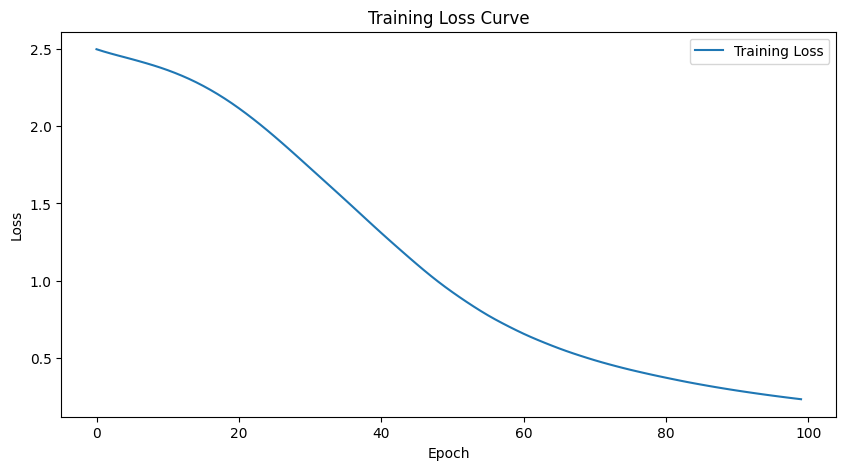

In [57]:
class CNN1DModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=1)
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]  # Number of input channels (features)
num_classes = len(label_encoder.classes_) #12

model = CNN1DModel(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


In [58]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.14%


# Lstm with attention

In [52]:
total_data

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
0,1430844,530.0,651.0,338.0,120.0,36.44,88.07,26.15,364.0,284.0,307.0,579.0,Soap
1,1430944,529.0,651.0,339.0,120.0,36.44,88.07,26.15,365.0,283.0,309.0,578.0,Soap
2,1431044,529.0,651.0,338.0,120.0,36.44,88.07,26.15,365.0,282.0,307.0,593.0,Soap
3,1431144,529.0,651.0,338.0,121.0,36.44,88.07,26.15,364.0,285.0,308.0,582.0,Soap
4,1431244,530.0,651.0,339.0,121.0,36.44,88.07,26.15,365.0,284.0,308.0,583.0,Soap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359212,7554492,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,333.0,305.0,390.0,Vicks
359213,7554592,528.0,716.0,380.0,115.0,35.33,88.34,29.34,442.0,333.0,305.0,390.0,Vicks
359214,7554692,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,334.0,306.0,390.0,Vicks
359215,7554792,528.0,716.0,379.0,114.0,35.33,88.34,29.34,442.0,333.0,304.0,390.0,Vicks


In [53]:
from sklearn.metrics import accuracy_score

df = pd.DataFrame(total_data)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(['timestamp', 'label'], axis=1)
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_tensor = X_tensor.unsqueeze(1)  

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [54]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, lstm_output, final_hidden_state):
        attn_weights = torch.bmm(lstm_output, final_hidden_state.unsqueeze(2)).squeeze(2)
        soft_attn_weights = torch.nn.functional.softmax(attn_weights, 1)
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)
        return context, soft_attn_weights

class LSTMAttentionModel(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, num_layers=1):
        super(LSTMAttentionModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        h_n = h_n[-1]  # Get the last hidden state
        context, attn_weights = self.attention(lstm_out, h_n)
        out = self.relu(context)
        out = self.fc(out)
        return out, attn_weights


In [55]:
# Parameters
input_size = X_train.shape[2]
hidden_dim = 64
output_size = len(df['label'].unique())
num_layers = 1
learning_rate = 0.001
num_epochs = 100


model = LSTMAttentionModel(input_size, hidden_dim, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs, attn_weights = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_outputs, _ = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/100], Loss: 2.4822
Epoch [2/100], Loss: 2.4792
Epoch [3/100], Loss: 2.4762
Epoch [4/100], Loss: 2.4733
Epoch [5/100], Loss: 2.4704
Epoch [6/100], Loss: 2.4675
Epoch [7/100], Loss: 2.4645
Epoch [8/100], Loss: 2.4616
Epoch [9/100], Loss: 2.4586
Epoch [10/100], Loss: 2.4557
Epoch [11/100], Loss: 2.4526
Epoch [12/100], Loss: 2.4496
Epoch [13/100], Loss: 2.4465
Epoch [14/100], Loss: 2.4433
Epoch [15/100], Loss: 2.4401
Epoch [16/100], Loss: 2.4368
Epoch [17/100], Loss: 2.4334
Epoch [18/100], Loss: 2.4300
Epoch [19/100], Loss: 2.4265
Epoch [20/100], Loss: 2.4228
Epoch [21/100], Loss: 2.4191
Epoch [22/100], Loss: 2.4153
Epoch [23/100], Loss: 2.4114
Epoch [24/100], Loss: 2.4073
Epoch [25/100], Loss: 2.4031
Epoch [26/100], Loss: 2.3988
Epoch [27/100], Loss: 2.3943
Epoch [28/100], Loss: 2.3897
Epoch [29/100], Loss: 2.3849
Epoch [30/100], Loss: 2.3800
Epoch [31/100], Loss: 2.3749
Epoch [32/100], Loss: 2.3696
Epoch [33/100], Loss: 2.3642
Epoch [34/100], Loss: 2.3586
Epoch [35/100], Loss: 2

# Gru Model : GRUs are similar to LSTMs but have a simpler structure. They are effective for sequence learning tasks and can be faster to train.

In [46]:
total_data

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
0,1430844,530.0,651.0,338.0,120.0,36.44,88.07,26.15,364.0,284.0,307.0,579.0,Soap
1,1430944,529.0,651.0,339.0,120.0,36.44,88.07,26.15,365.0,283.0,309.0,578.0,Soap
2,1431044,529.0,651.0,338.0,120.0,36.44,88.07,26.15,365.0,282.0,307.0,593.0,Soap
3,1431144,529.0,651.0,338.0,121.0,36.44,88.07,26.15,364.0,285.0,308.0,582.0,Soap
4,1431244,530.0,651.0,339.0,121.0,36.44,88.07,26.15,365.0,284.0,308.0,583.0,Soap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359212,7554492,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,333.0,305.0,390.0,Vicks
359213,7554592,528.0,716.0,380.0,115.0,35.33,88.34,29.34,442.0,333.0,305.0,390.0,Vicks
359214,7554692,528.0,716.0,379.0,115.0,35.33,88.34,29.34,441.0,334.0,306.0,390.0,Vicks
359215,7554792,528.0,716.0,379.0,114.0,35.33,88.34,29.34,442.0,333.0,304.0,390.0,Vicks


In [47]:

df = pd.DataFrame(total_data)


label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


X = df.drop(['timestamp', 'label'], axis=1)
y = df['label']


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Reshape X_tensor for GRU input (batch_size, sequence_length, input_size)
X_tensor = X_tensor.unsqueeze(1)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [51]:
X_train.shape

torch.Size([287373, 1, 11])

In [48]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, num_classes):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.relu(out[:, -1, :])
        out = self.fc(out)
        return out


In [49]:
# Parameters
input_size = X_train.shape[2]#11 chennel
hidden_dim = 64
output_size = len(df['label'].unique()) #12
num_layers = 2
learning_rate = 0.001
num_epochs = 100

model = GRUModel(input_size, hidden_dim, num_layers, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
training_plot =[] 


for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    training_plot.append(loss.item())
    
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/100], Loss: 2.4885
Epoch [2/100], Loss: 2.4851
Epoch [3/100], Loss: 2.4818
Epoch [4/100], Loss: 2.4784
Epoch [5/100], Loss: 2.4752
Epoch [6/100], Loss: 2.4719
Epoch [7/100], Loss: 2.4686
Epoch [8/100], Loss: 2.4652
Epoch [9/100], Loss: 2.4617
Epoch [10/100], Loss: 2.4581
Epoch [11/100], Loss: 2.4543
Epoch [12/100], Loss: 2.4505
Epoch [13/100], Loss: 2.4464
Epoch [14/100], Loss: 2.4422
Epoch [15/100], Loss: 2.4378
Epoch [16/100], Loss: 2.4332
Epoch [17/100], Loss: 2.4284
Epoch [18/100], Loss: 2.4232
Epoch [19/100], Loss: 2.4178
Epoch [20/100], Loss: 2.4120
Epoch [21/100], Loss: 2.4059
Epoch [22/100], Loss: 2.3994
Epoch [23/100], Loss: 2.3925
Epoch [24/100], Loss: 2.3853
Epoch [25/100], Loss: 2.3776
Epoch [26/100], Loss: 2.3695
Epoch [27/100], Loss: 2.3610
Epoch [28/100], Loss: 2.3520
Epoch [29/100], Loss: 2.3426
Epoch [30/100], Loss: 2.3327
Epoch [31/100], Loss: 2.3224
Epoch [32/100], Loss: 2.3115
Epoch [33/100], Loss: 2.3001
Epoch [34/100], Loss: 2.2883
Epoch [35/100], Loss: 2

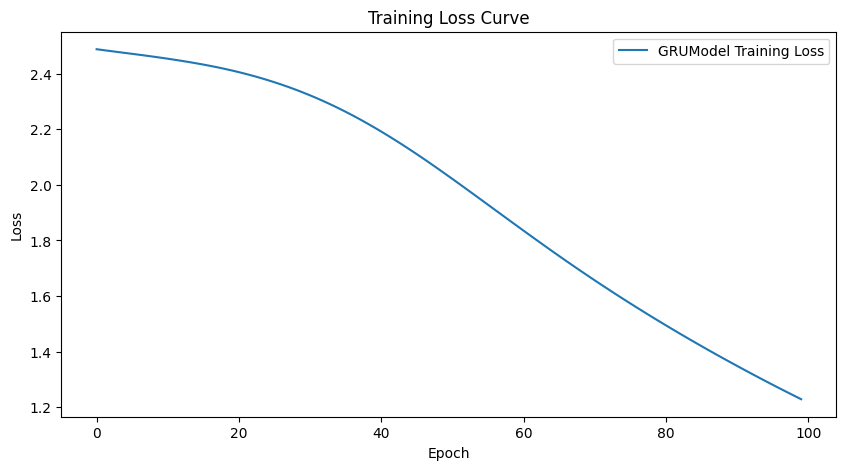

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(training_plot, label='GRUModel Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Gru timeseries

In [13]:
total_data['label'].unique()

array(['Soap', 'Coriander', 'Volini', 'Clinic_plus', 'Onion',
       'Cumin_Seeds', 'Polo', 'Cardamom', 'Vicks', 'Background',
       'Incense_stick', 'Ginger', 'Sanitizer', 'Garlic', 'Turmeric'],
      dtype=object)

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# # Provided data
data = {
    'timestamp': [45646, 171998, 210207, 142170],
    'voc2': [4096694, 9609475, 19402022, 11421708],
    'no2': [491.0, 507.0, 382.0, 437.0],
    'eth': [633.0, 643.0, 569.0, 579.0],
    'co': [289.0, 307.0, 200.0, 218.0],
    'temp': [120.0, 119.0, 139.0, 102.0],
    'pressure': [36.85, 33.61, 35.65, 36.76],
    'humidity': [88.08, 88.35, 88.09, 88.18],
    'mq3': [25.61, 36.81, 28.25, 22.62],
    'mq7': [356.0, 368.0, 263.0, 425.0],
    'mq9': [290.0, 328.0, 327.0, 356.0],
    'mq135': [329.0, 328.0, 260.0, 292.0],
    'label': ['Soap', 'Cardamom', 'Garlic', 'Incense_stick']
}

df = pd.DataFrame(total_data)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(['timestamp', 'label'], axis=1).values
y = df['label'].values

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


def create_sequences(data, labels, seq_length):
    sequences = []
    labels_seq = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        label = labels[i + seq_length - 1]
        sequences.append(seq)
        labels_seq.append(label)
    return torch.stack(sequences), torch.tensor(labels_seq)

seq_length = 2  # Example sequence length
X_seq, y_seq = create_sequences(X_tensor, y_tensor, seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42 , shuffle=False)
print(X_seq.shape)
print(y_seq.shape)


torch.Size([250111, 2, 11])
torch.Size([250111])


In [15]:
# splitting = (X_seq.shape[0] *0.25)
# splitting
# X_train = X_seq[:splitting]
# y_tran = y_seq[: splitting]
# X_test = X_seq[splitting:]
# y_test = y_seq[splitting:]
# print(X_test.shape, X_train)

In [16]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, num_classes):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.relu(out[:, -1, :])
        out = self.fc(out)
        return out


In [17]:
X_train.shape , y_train.shape , len(set(y))

(torch.Size([200088, 2, 11]), torch.Size([200088]), 15)

In [18]:
# Model parameters
input_size = X_train.shape[2]
hidden_dim = 64
num_layers = 2
num_classes = len(set(y))
learning_rate = 0.001
num_epochs = 100

# Initialize model, criterion, and optimizer
model = GRUModel(input_size, hidden_dim, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/50], Loss: 2.6994
Epoch [2/50], Loss: 2.6904
Epoch [3/50], Loss: 2.6815
Epoch [4/50], Loss: 2.6727
Epoch [5/50], Loss: 2.6637
Epoch [6/50], Loss: 2.6547
Epoch [7/50], Loss: 2.6455
Epoch [8/50], Loss: 2.6361
Epoch [9/50], Loss: 2.6263
Epoch [10/50], Loss: 2.6162
Epoch [11/50], Loss: 2.6056
Epoch [12/50], Loss: 2.5945
Epoch [13/50], Loss: 2.5828
Epoch [14/50], Loss: 2.5705
Epoch [15/50], Loss: 2.5575
Epoch [16/50], Loss: 2.5438
Epoch [17/50], Loss: 2.5294
Epoch [18/50], Loss: 2.5143
Epoch [19/50], Loss: 2.4983
Epoch [20/50], Loss: 2.4815
Epoch [21/50], Loss: 2.4638
Epoch [22/50], Loss: 2.4452
Epoch [23/50], Loss: 2.4257
Epoch [24/50], Loss: 2.4054
Epoch [25/50], Loss: 2.3841
Epoch [26/50], Loss: 2.3618
Epoch [27/50], Loss: 2.3387
Epoch [28/50], Loss: 2.3146
Epoch [29/50], Loss: 2.2898
Epoch [30/50], Loss: 2.2642
Epoch [31/50], Loss: 2.2379
Epoch [32/50], Loss: 2.2111
Epoch [33/50], Loss: 2.1837
Epoch [34/50], Loss: 2.1560
Epoch [35/50], Loss: 2.1281
Epoch [36/50], Loss: 2.1002
E

In [12]:
import sktime

In [33]:
y_train_val = pd.DataFrame(y_train.numpy())
y_test_val  = pd.DataFrame(y_test.numpy())

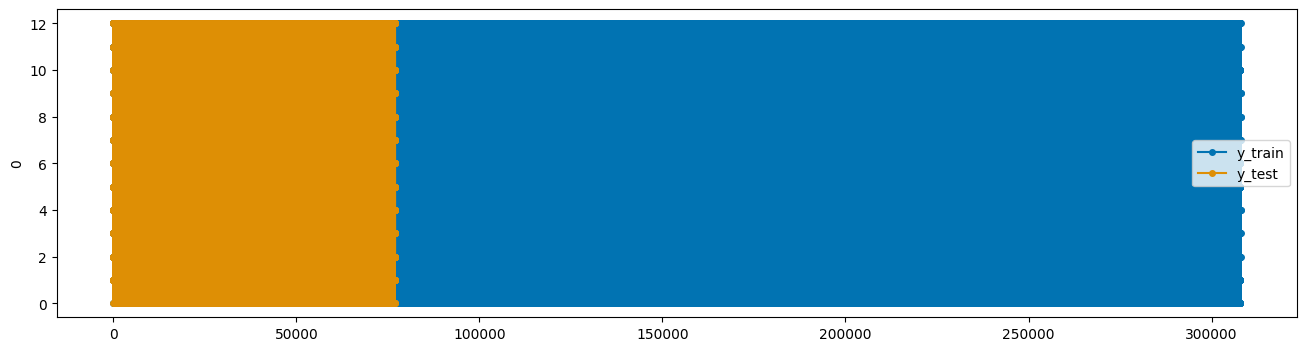

In [42]:
sktime.utils.plotting.plot_series(y_train_val, y_test_val, labels=["y_train", "y_test"])
plt.show()

# bidirectional LSTM 

In [55]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.DataFrame(total_data)
print(type(df))

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
# Separate features and labels
X = df.drop(['timestamp', 'label'], axis=1).values
y = df['label'].values

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

<class 'pandas.core.frame.DataFrame'>


In [56]:
X_tensor.shape , y_tensor.shape

(torch.Size([453038, 11]), torch.Size([453038]))

In [57]:
# Function to create sequences
def create_sequences(data, labels, seq_length):
    sequences = []
    labels_seq = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        label = labels[i + seq_length - 1]
        sequences.append(seq)
        labels_seq.append(label)
    return torch.stack(sequences), torch.tensor(labels_seq)

In [ ]:
# Create sequences
seq_length = 600  # Example sequence length
X_seq, y_seq = create_sequences(X_tensor, y_tensor, seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [63]:
X_seq.shape  , y_seq.shape

(torch.Size([453037, 2, 11]), torch.Size([453037]))

In [45]:
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, num_classes):
        super(BiLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)  # *2 for bidirectional
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(x.device)  # *2 for bidirectional
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(x.device)  # *2 for bidirectional
        out, _ = self.lstm(x, (h0, c0))
        out = self.relu(out[:, -1, :])
        out = self.fc(out)
        return out


In [46]:
# Model parameters
input_size = X_train.shape[2]
hidden_dim = 64
num_layers = 2
num_classes = len(set(y))
learning_rate = 0.001
num_epochs = 100

# Initialize model, criterion, and optimizer
model = BiLSTMModel(input_size, hidden_dim, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')


/home/avinash/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [10/100], Loss: 1.2724
Epoch [20/100], Loss: 1.0890
Epoch [30/100], Loss: 0.7145
Epoch [40/100], Loss: 0.3238
Epoch [50/100], Loss: 0.1138
Epoch [60/100], Loss: 0.0448
Epoch [70/100], Loss: 0.0243
Epoch [80/100], Loss: 0.0162
Epoch [90/100], Loss: 0.0120
Epoch [100/100], Loss: 0.0096
Test Accuracy: 0.0000
